In [1]:
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
import pandas as pd
import seaborn as sns
from collections import Counter
color = sns.color_palette()

from helpers import *


In [8]:
products = pd.read_csv('data/products.csv')
orders = pd.read_csv('data/orders.csv')
order_train = pd.read_csv('data/order_products__train.csv')
departments = pd.read_csv('data/departments.csv')
aisles = pd.read_csv('data/aisles.csv')
order_prior = pd.read_csv('data/order_products__prior.csv')
sample_sub = pd.read_csv('data/sample_submission.csv')

In [3]:
products

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
...,...,...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5
49684,49685,En Croute Roast Hazelnut Cranberry,42,1
49685,49686,Artisan Baguette,112,3
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8


In [4]:
orders

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
...,...,...,...,...,...,...,...
3421078,2266710,206209,prior,10,5,18,29.0
3421079,1854736,206209,prior,11,4,10,30.0
3421080,626363,206209,prior,12,1,12,18.0
3421081,2977660,206209,prior,13,1,12,7.0


In [12]:
orders.order_number.describe()

count    3.421083e+06
mean     1.715486e+01
std      1.773316e+01
min      1.000000e+00
25%      5.000000e+00
50%      1.100000e+01
75%      2.300000e+01
max      1.000000e+02
Name: order_number, dtype: float64

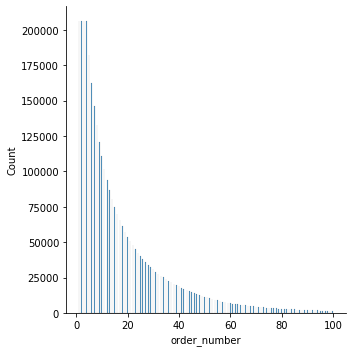

In [10]:
sns.displot(orders.order_number)

In [6]:
order_train

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
...,...,...,...,...
1384612,3421063,14233,3,1
1384613,3421063,35548,4,1
1384614,3421070,35951,1,1
1384615,3421070,16953,2,1


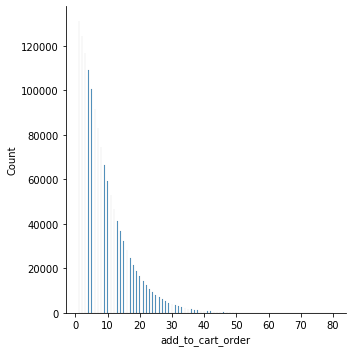

In [13]:
sns.displot(order_train.add_to_cart_order)

In [16]:
order_train.add_to_cart_order.describe()

count    1.384617e+06
mean     8.758044e+00
std      7.423936e+00
min      1.000000e+00
25%      3.000000e+00
50%      7.000000e+00
75%      1.200000e+01
max      8.000000e+01
Name: add_to_cart_order, dtype: float64

In [9]:
order_prior

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
...,...,...,...,...
32434484,3421083,39678,6,1
32434485,3421083,11352,7,0
32434486,3421083,4600,8,0
32434487,3421083,24852,9,1


In [ ]:
order